**Basic CNN to detect any intracranial hemorrhage**
It just takes some part of the data to be quick and creates a simple CNN with approximate accuracy 0.83 detecting possibility of any ich. returns 0 or 1 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# Any results you write to the current directory are saved as output.

In [2]:
datadir = "/kaggle/input/rsna-intracranial-hemorrhage-detection/stage_1_train_images/"
train_data=pd.read_csv('/kaggle/input/rsna-intracranial-hemorrhage-detection/stage_1_train.csv')

In [3]:
#train_images = [f for f in os.listdir(datadir) if os.path.isfile(os.path.join(datadir, f))]

import pydicom
import matplotlib.pyplot as plt

In [4]:
train=train_data.head(14400)
train.tail()

,ID,Label
14395,ID_89faf3df8_intraparenchymal,0
14396,ID_89faf3df8_intraventricular,0
14397,ID_89faf3df8_subarachnoid,0
14398,ID_89faf3df8_subdural,0
14399,ID_89faf3df8_any,0


In [5]:
train['Sub_type'] = train['ID'].str.split("_", n = 3, expand = True)[2]
train['PatientID'] = train['ID'].str.split("_", n = 3, expand = True)[1]
train.tail()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ID,Label,Sub_type,PatientID
14395,ID_89faf3df8_intraparenchymal,0,intraparenchymal,89faf3df8
14396,ID_89faf3df8_intraventricular,0,intraventricular,89faf3df8
14397,ID_89faf3df8_subarachnoid,0,subarachnoid,89faf3df8
14398,ID_89faf3df8_subdural,0,subdural,89faf3df8
14399,ID_89faf3df8_any,0,any,89faf3df8


In [6]:
train_ich_1 = train[(train.Label==1) & (train.Sub_type=="any")]
train_ich_0 = train[(train.Label==0) & (train.Sub_type=="any")]

In [7]:
import cv2
data=[]
IMG_SIZE=512
for raw in train_ich_1.values:
    path=os.path.join(datadir,"ID_" +raw[3]+".dcm")
    dc= pydicom.dcmread(path)
    im=dc.pixel_array
    im2 = cv2.resize(im, (IMG_SIZE, IMG_SIZE))
    data.append([im2,raw[1]])
    
    #plt.imshow(im, cmap=plt.cm.bone)
    #plt.show()
 

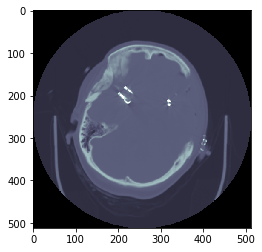

1


In [8]:
plt.imshow(data[5][0], cmap=plt.cm.bone)
plt.show()
print(data[5][1])

In [9]:
for raw in train_ich_0.values:
    path=os.path.join(datadir,"ID_" +raw[3]+".dcm")
    dc= pydicom.dcmread(path)
    im=dc.pixel_array
    im2 = cv2.resize(im, (IMG_SIZE, IMG_SIZE))
    data.append([im2,raw[1]])

In [10]:
X=[]
y=[]
for features,label in data:
    X.append(features)
    y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y).reshape(-1, 1)
y.shape
X.shape

(2400, 512, 512, 1)

In [11]:
import tensorflow as tf
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(8, activation=tf.nn.relu))#adding layer 1
classifier.add(tf.keras.layers.Dense(8, activation=tf.nn.relu))#adding layer 2
classifier.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))#output layer
classifier.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) #compile with basic settings

In [12]:
X=X/1024.0


In [13]:
classifier.fit(X,y,epochs=3)

Epoch 1/3
2400/2400 [==============================] - 8s 3ms/sample - loss: 1.4974 - acc: 0.8283
Epoch 2/3
2400/2400 [==============================] - 8s 3ms/sample - loss: 0.6569 - acc: 0.8408
Epoch 3/3
2400/2400 [==============================] - 8s 3ms/sample - loss: 0.5326 - acc: 0.8392
